<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/11-K-Means-Clustering/01_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering


An example of unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Exploratory Data Analysis

In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


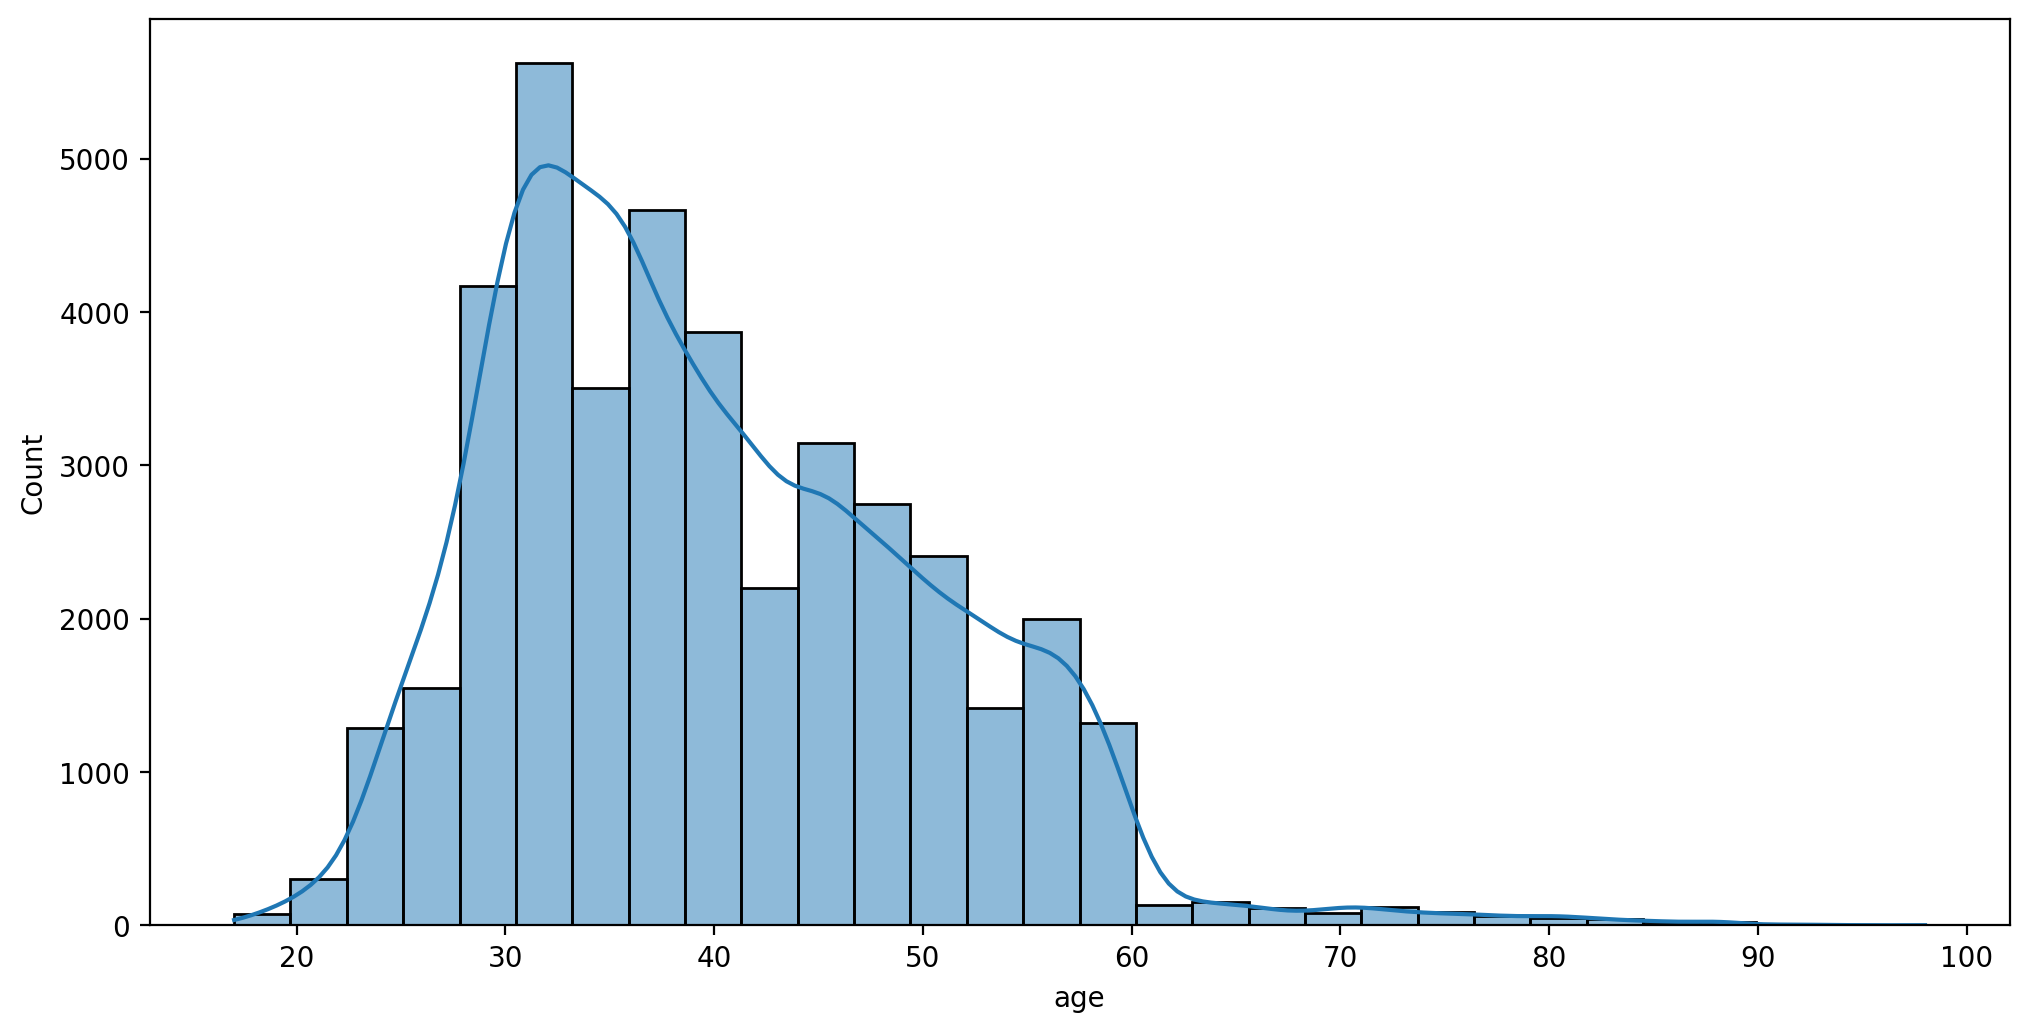

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=30,kde='True');

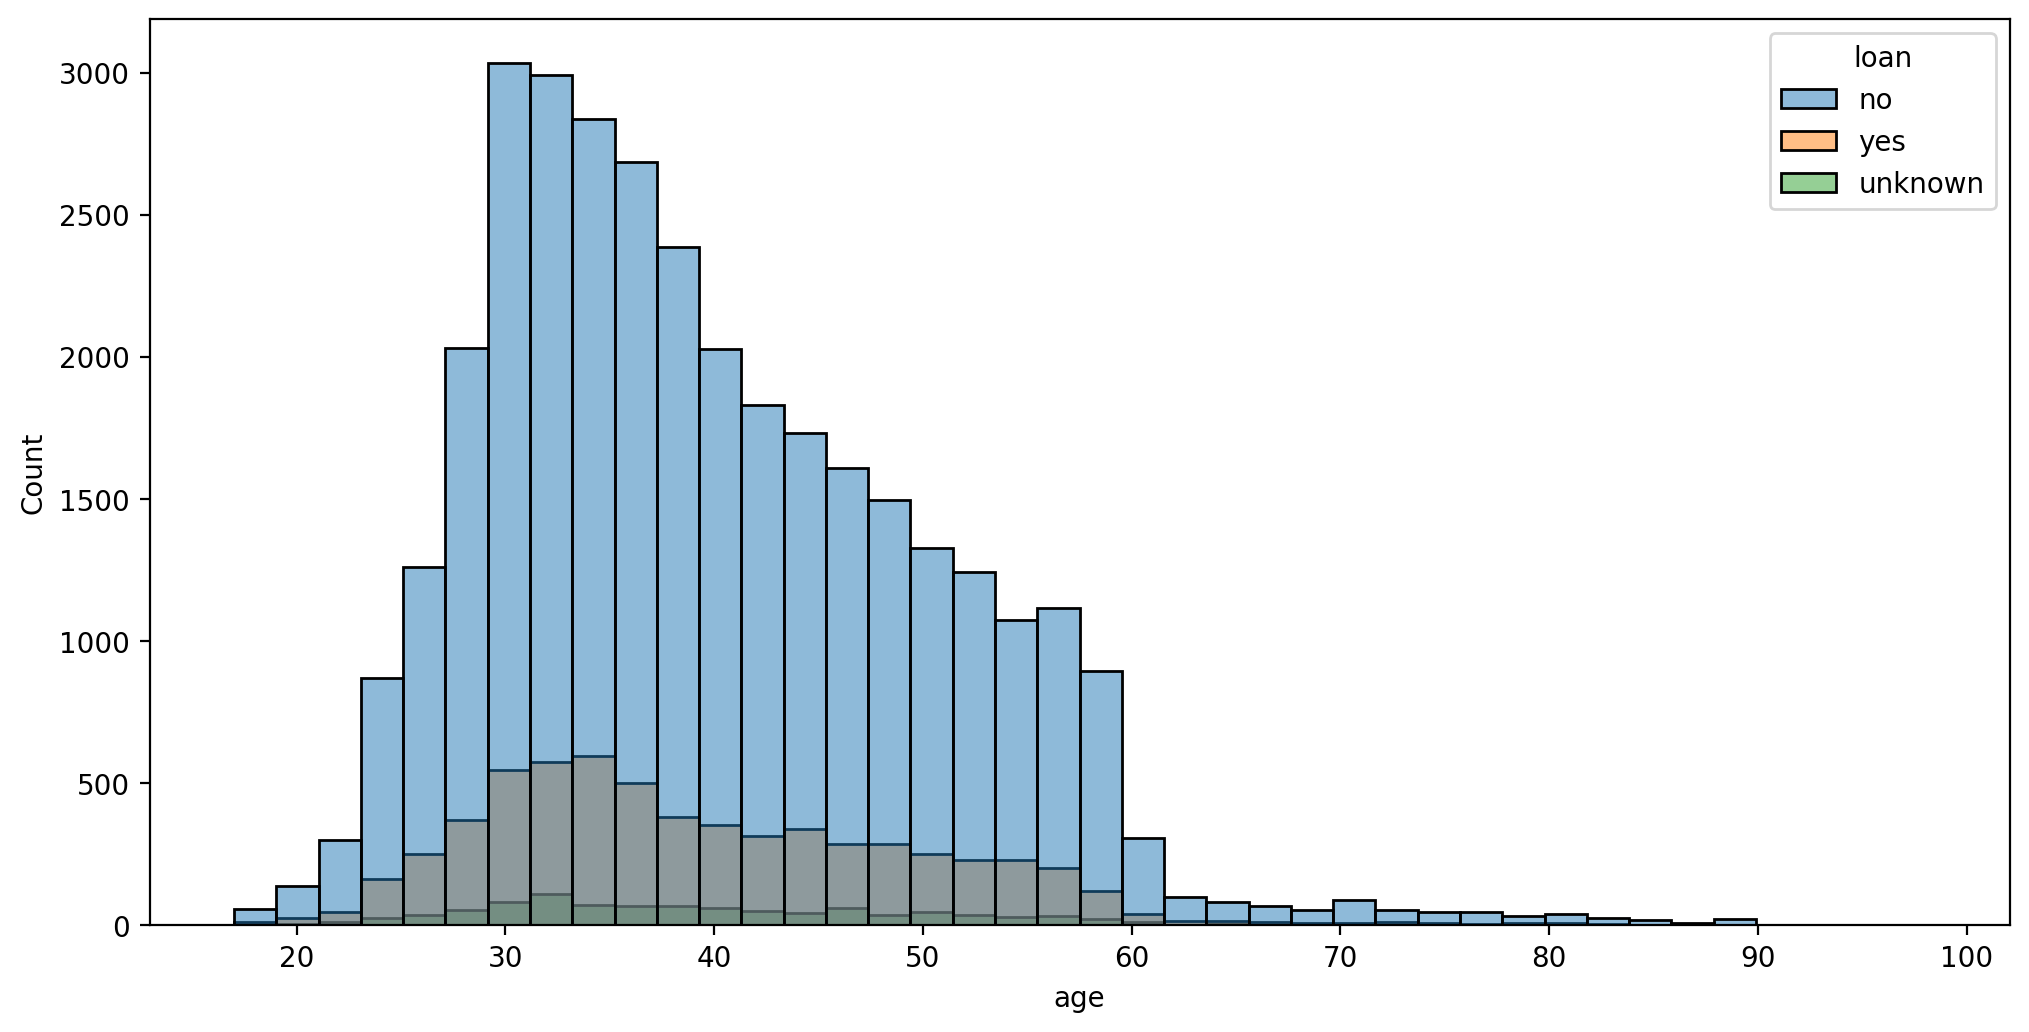

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=40,hue='loan')

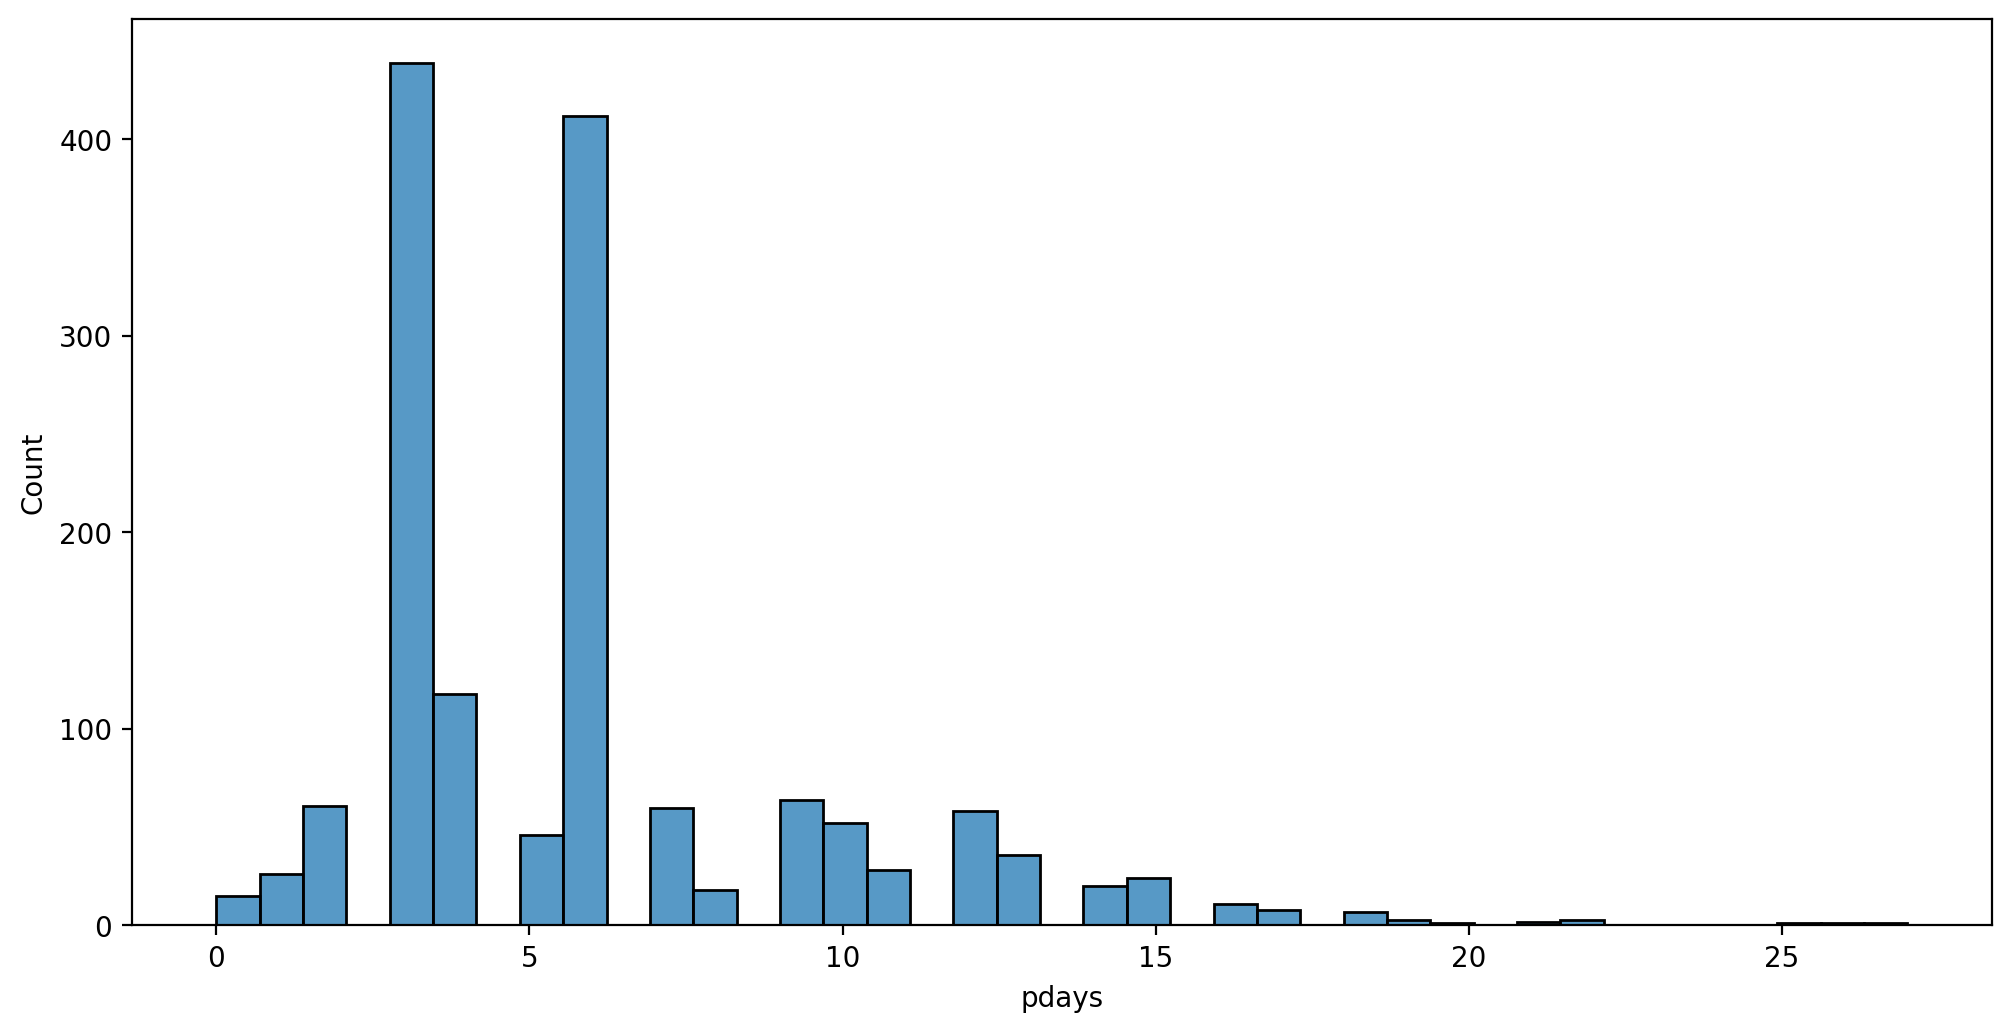

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x='pdays',data=df[df['pdays']!=999])

In [10]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

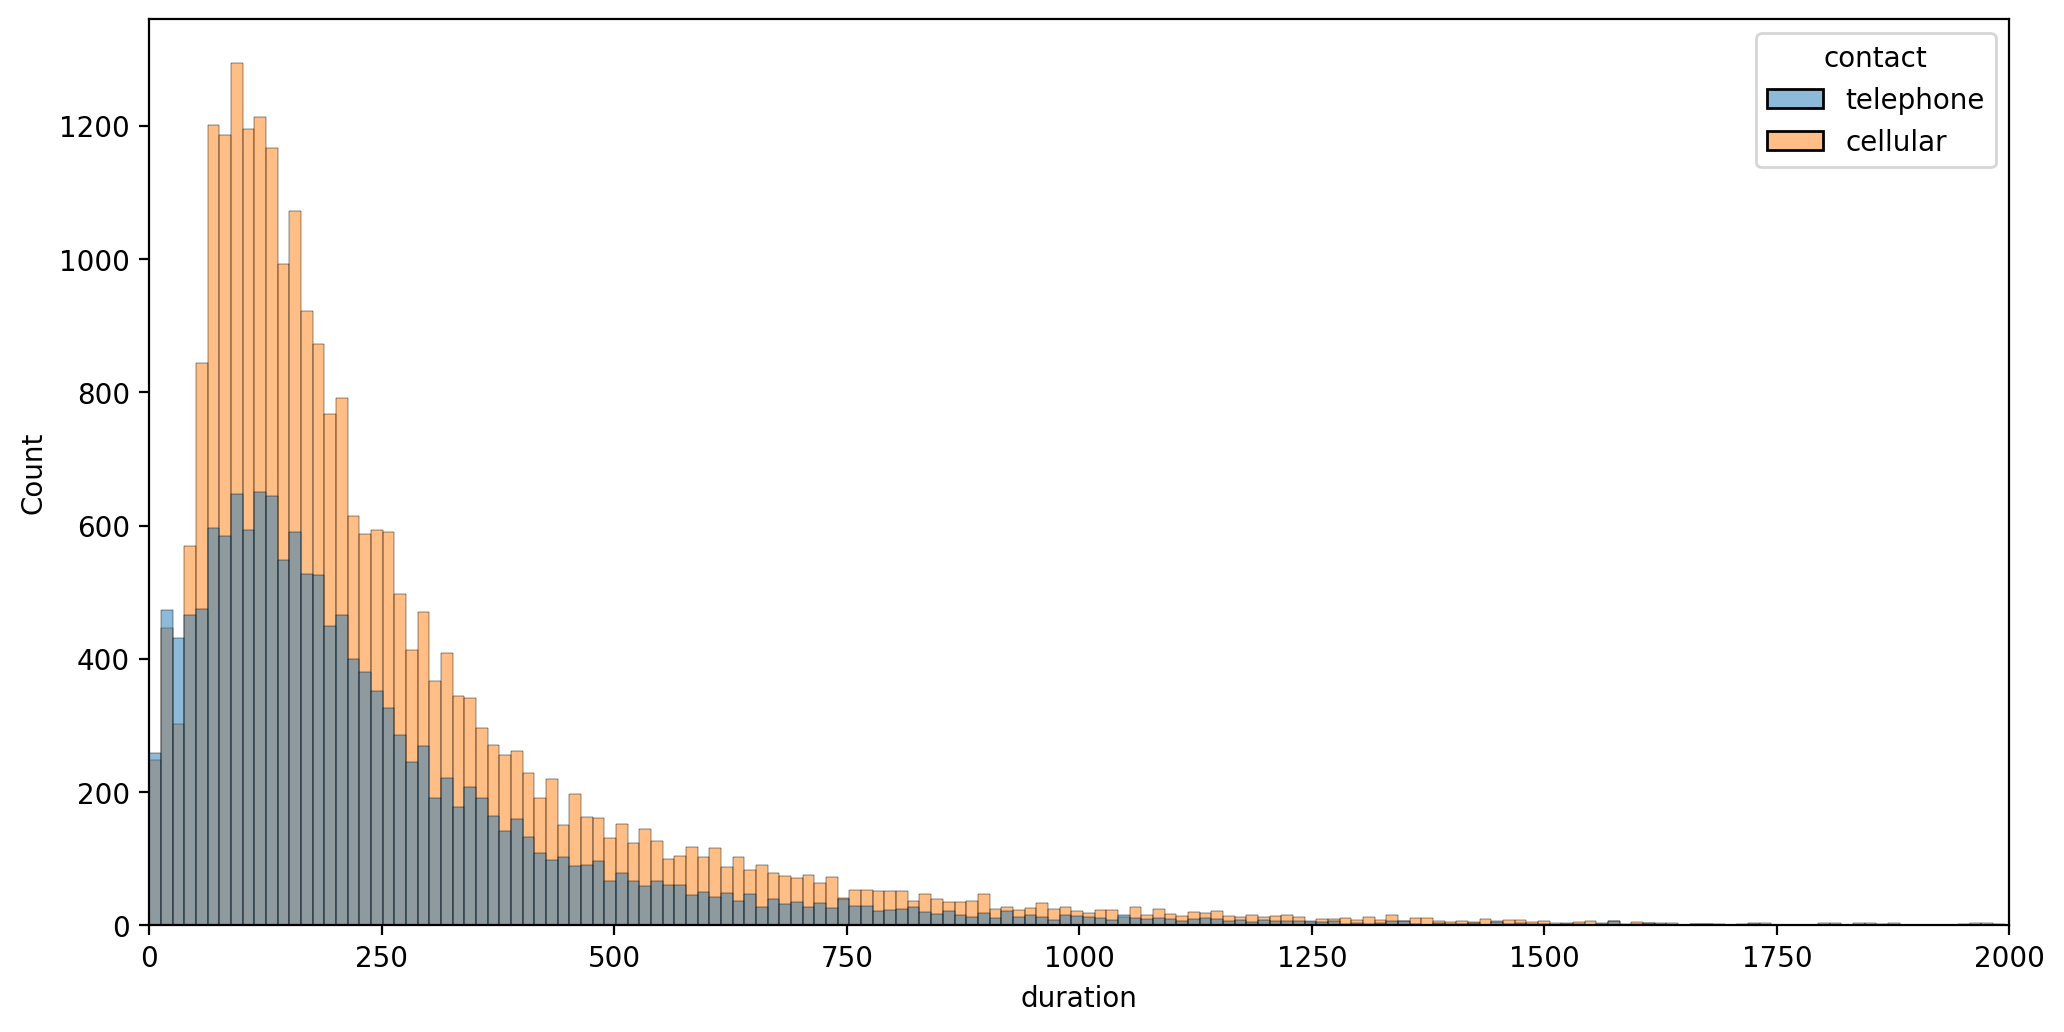

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x='duration',data=df,hue='contact')
plt.xlim(0,2000);

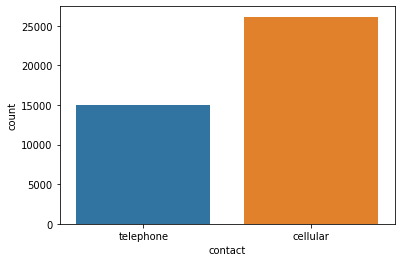

In [12]:
sns.countplot(data=df,x='contact')

In [13]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

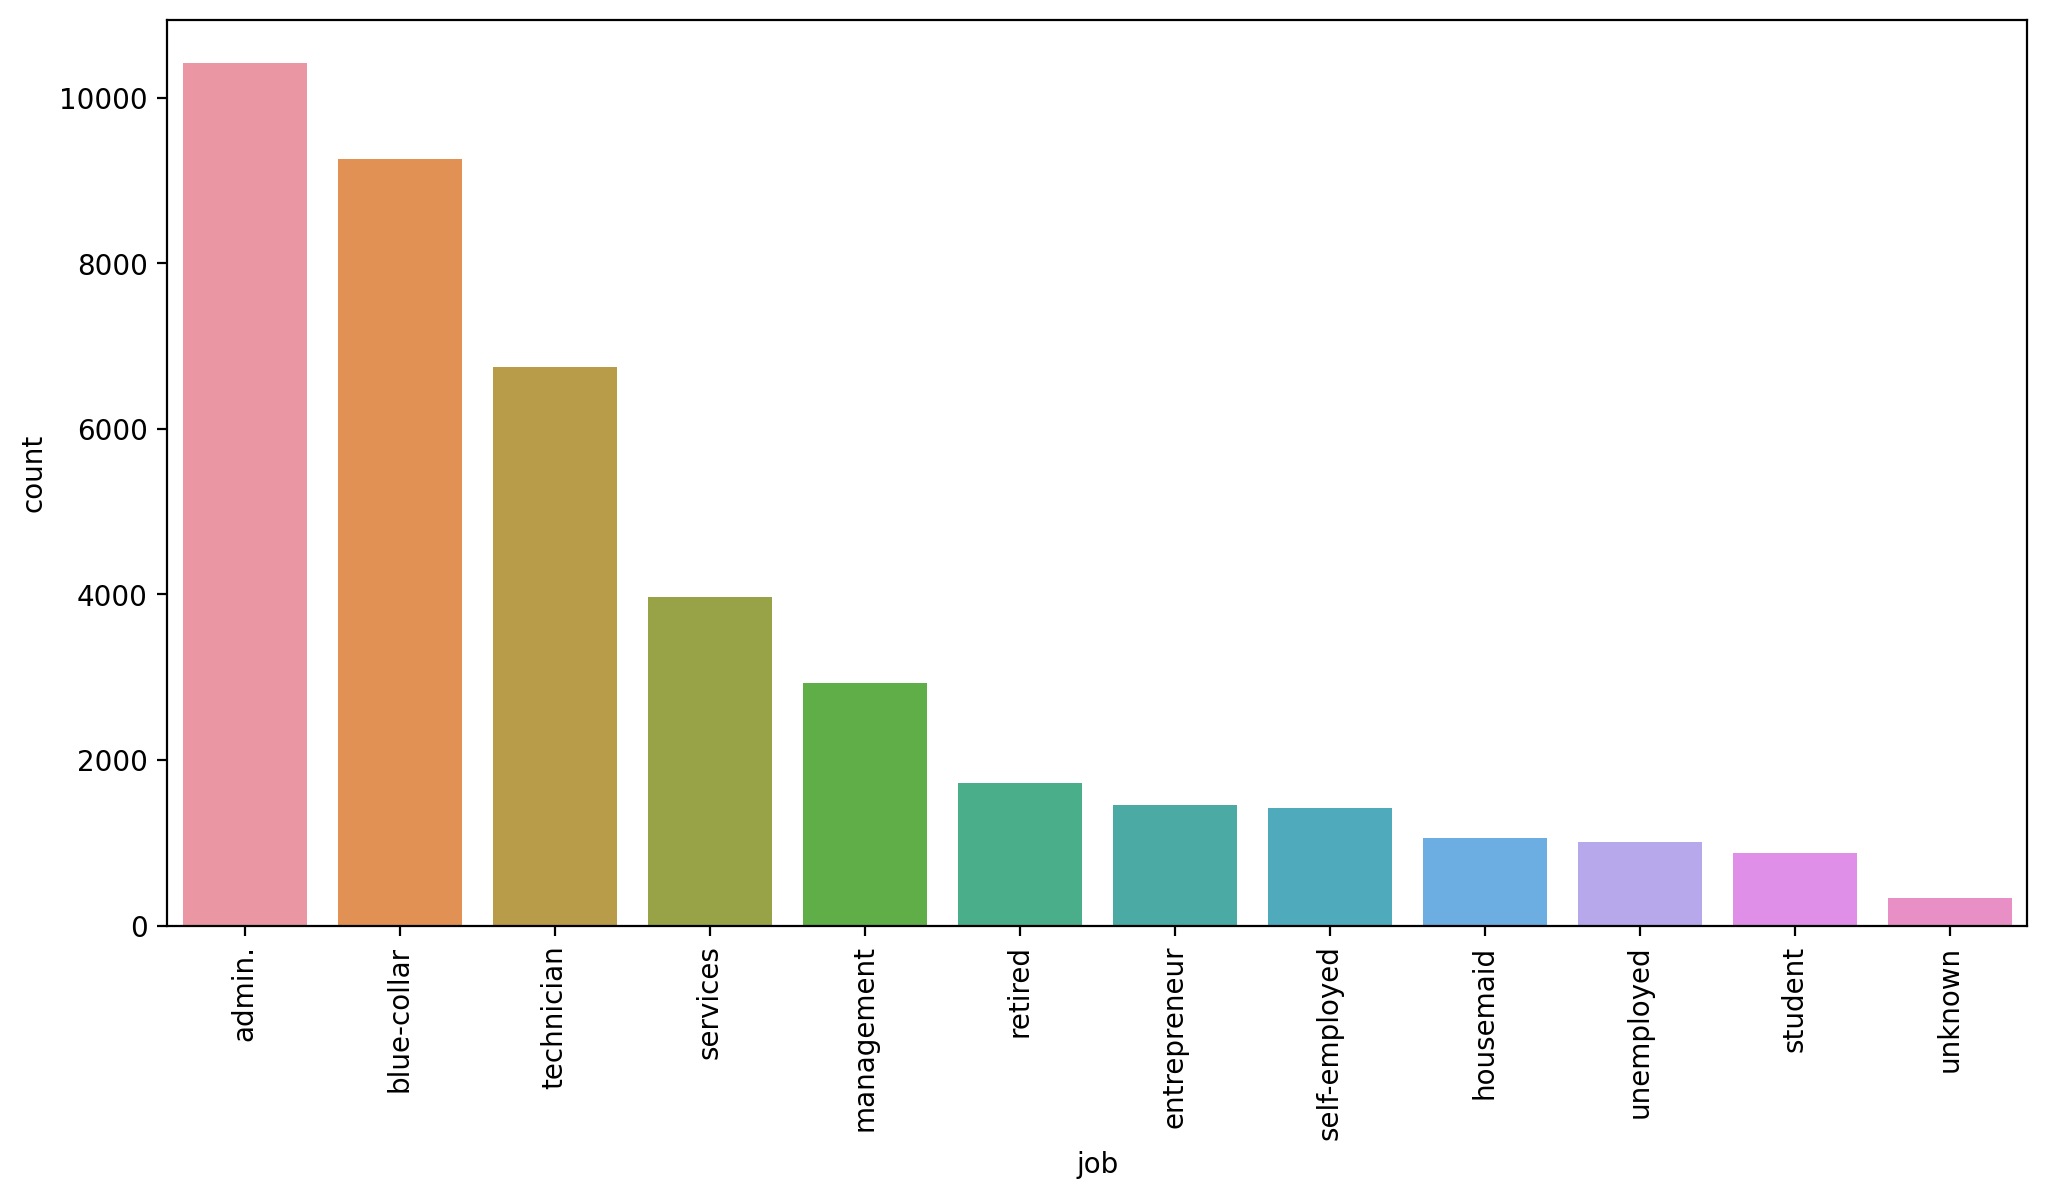

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

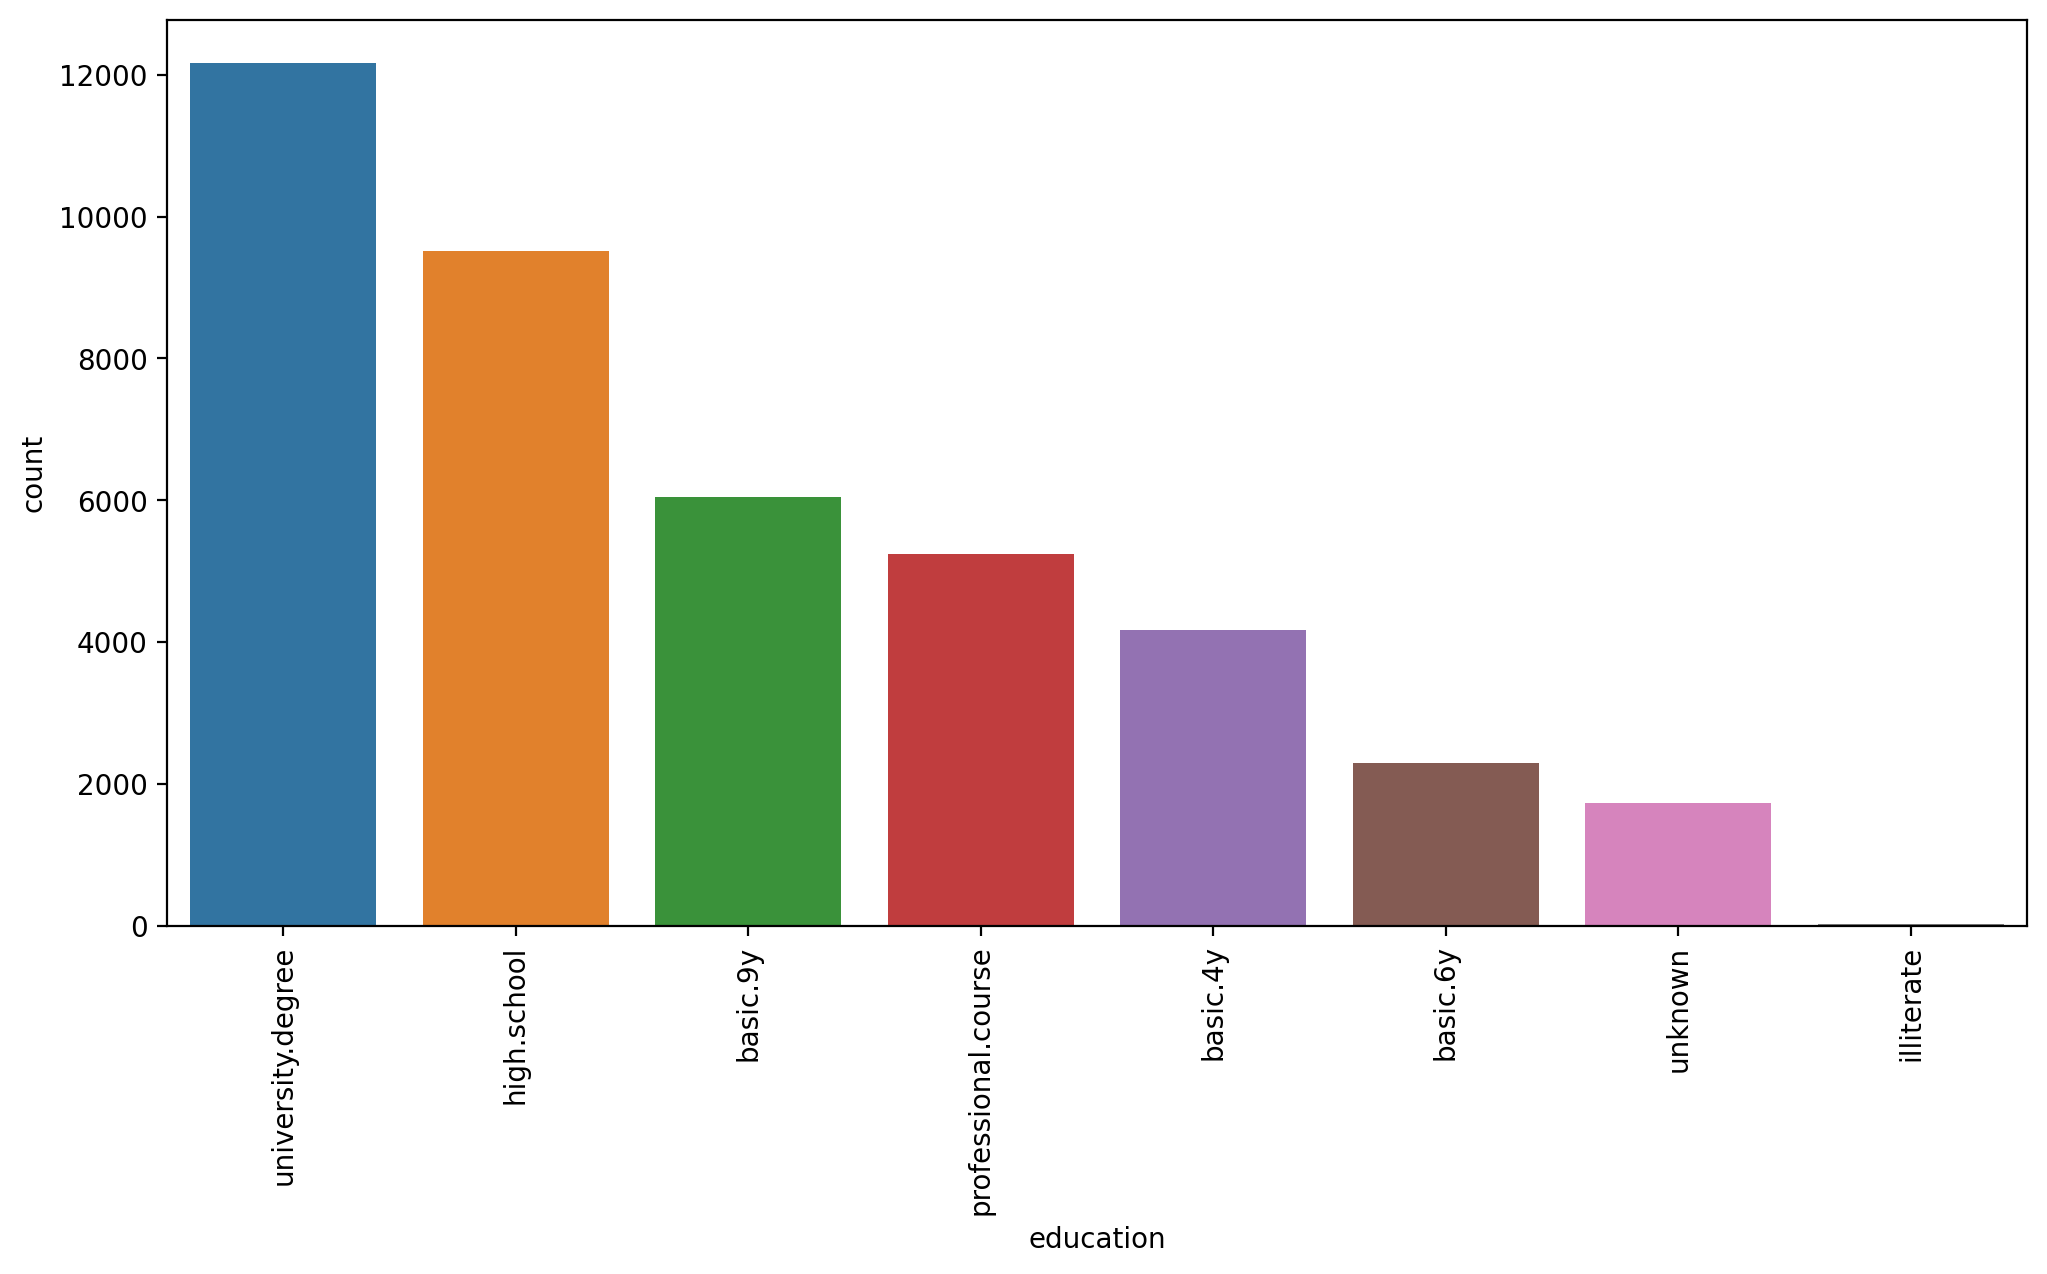

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

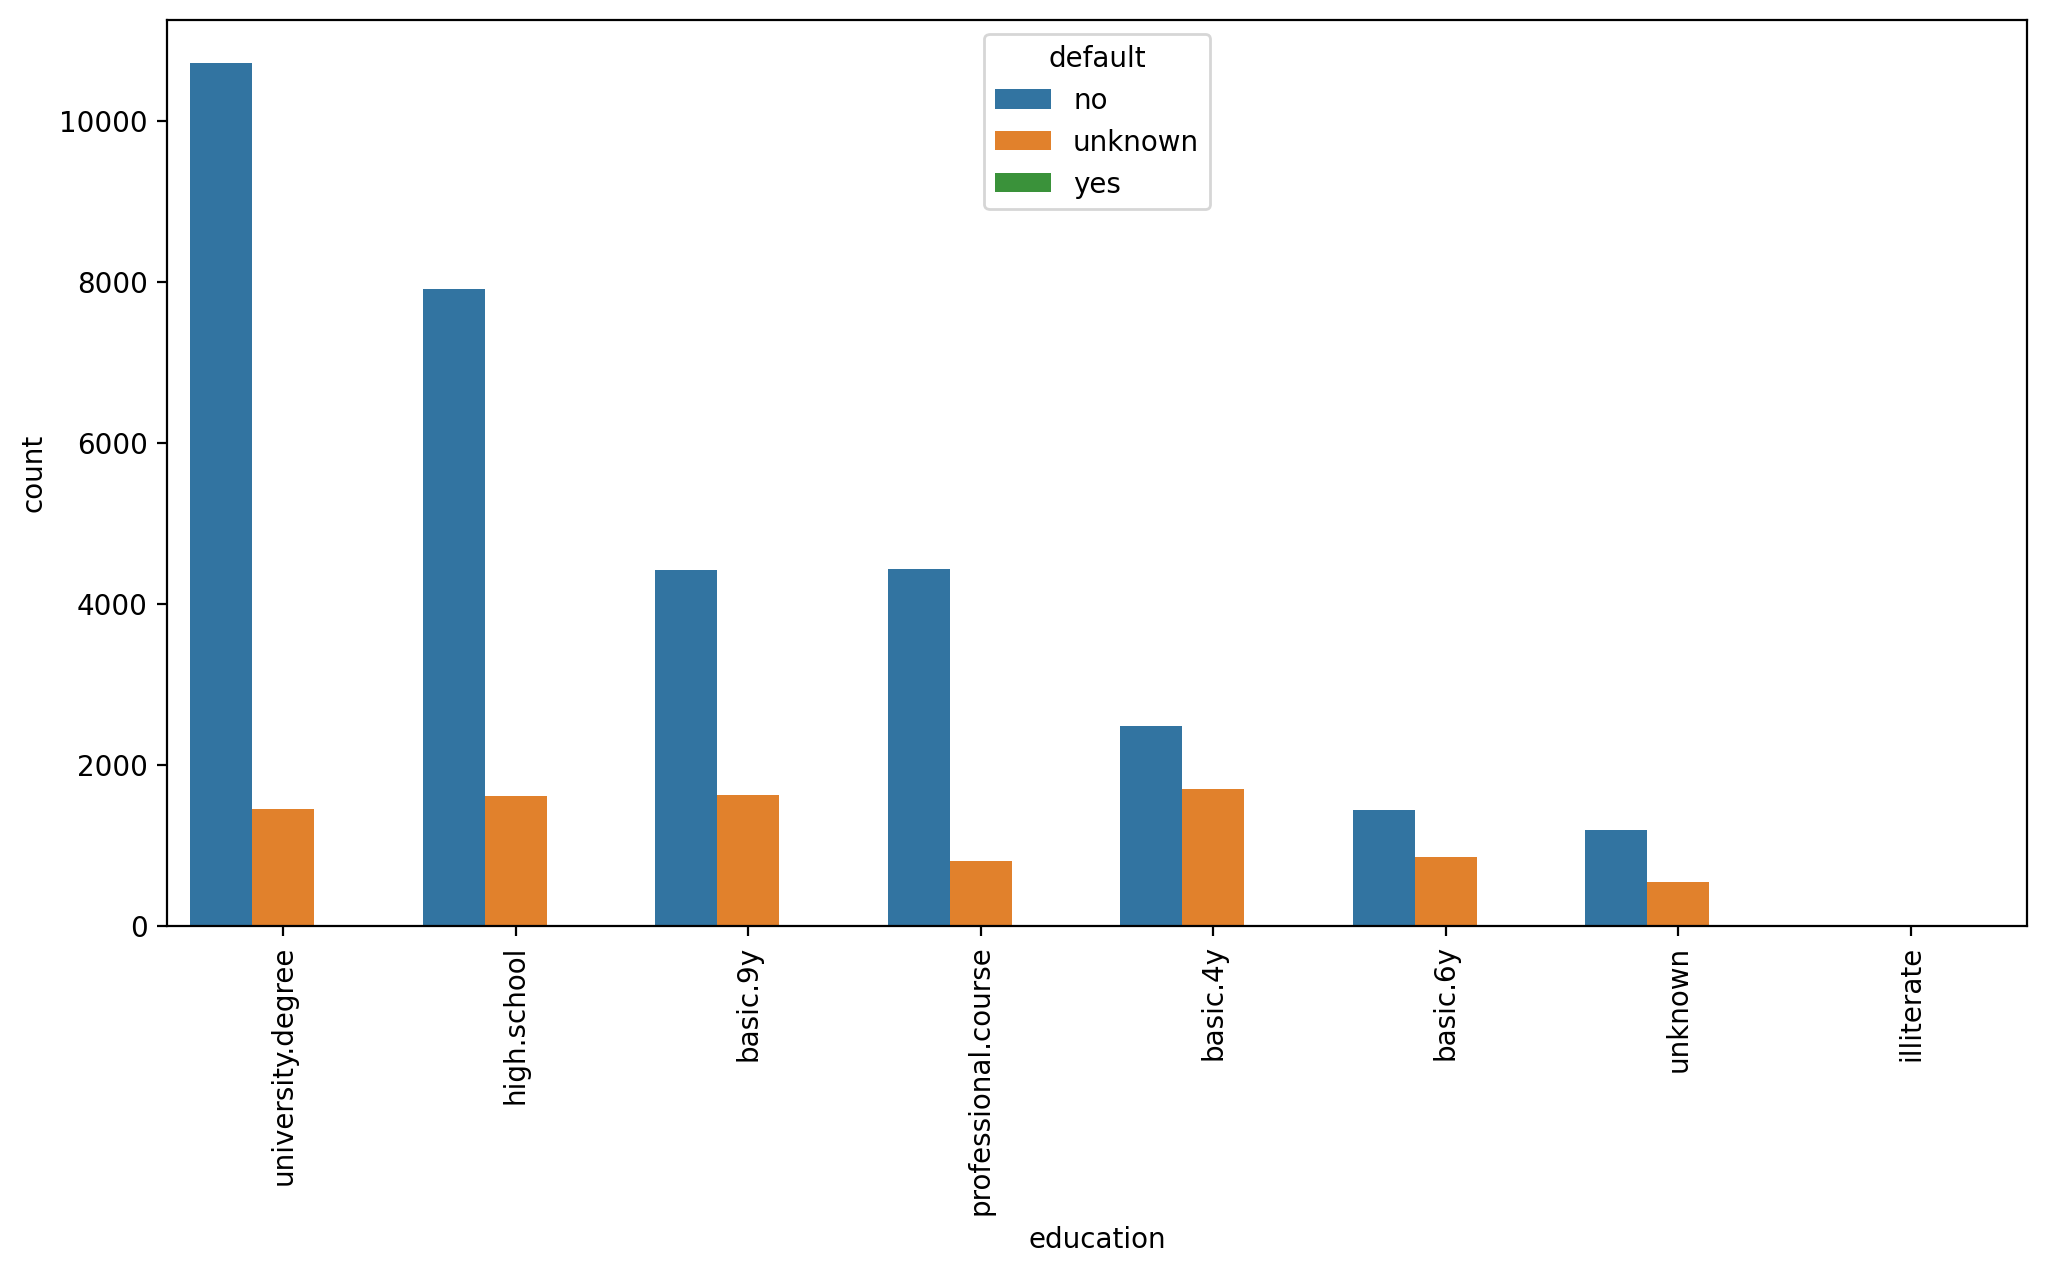

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

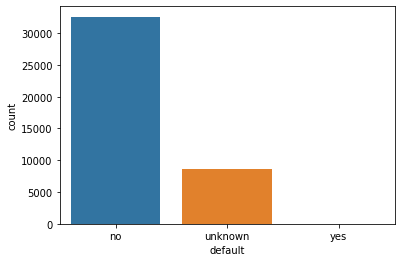

In [17]:
sns.countplot(data=df,x='default')

In [18]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [19]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

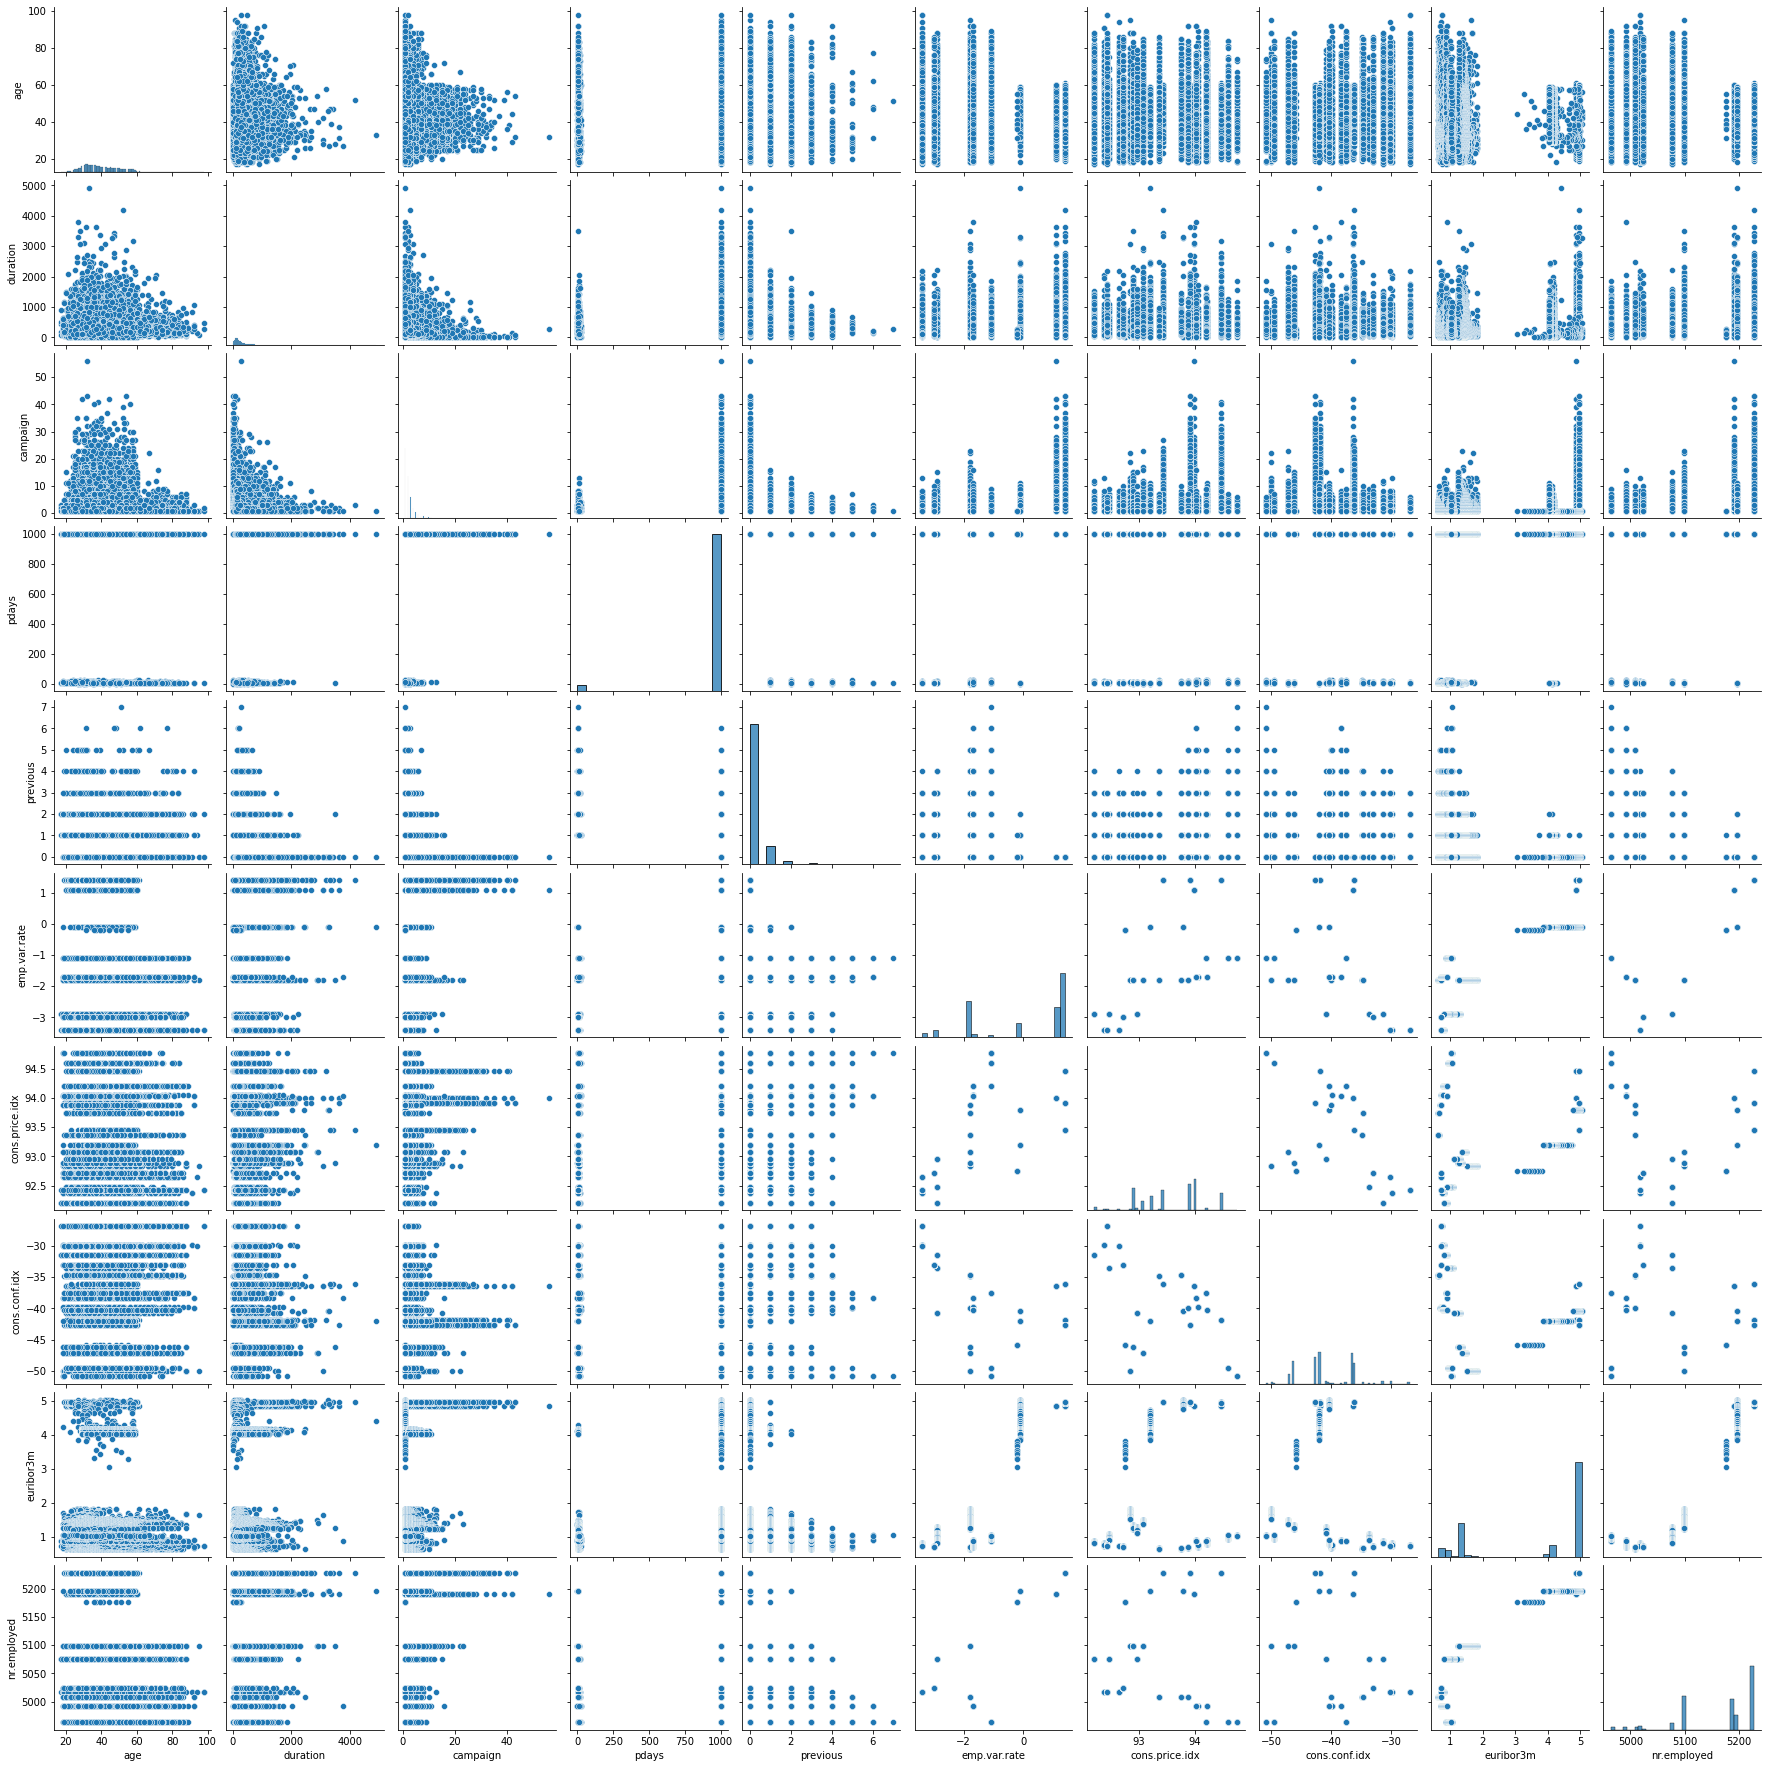

In [20]:
sns.pairplot(data=df)

## Clustering

In [21]:
X = pd.get_dummies(df)

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [26]:
from sklearn.cluster import KMeans

In [ ]:
help(KMeans)

In [28]:
model = KMeans(n_clusters=2)

In [29]:
cluster_labels = model.fit_predict(scaled_X)

In [30]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [31]:
X['cluster'] = cluster_labels

In [32]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


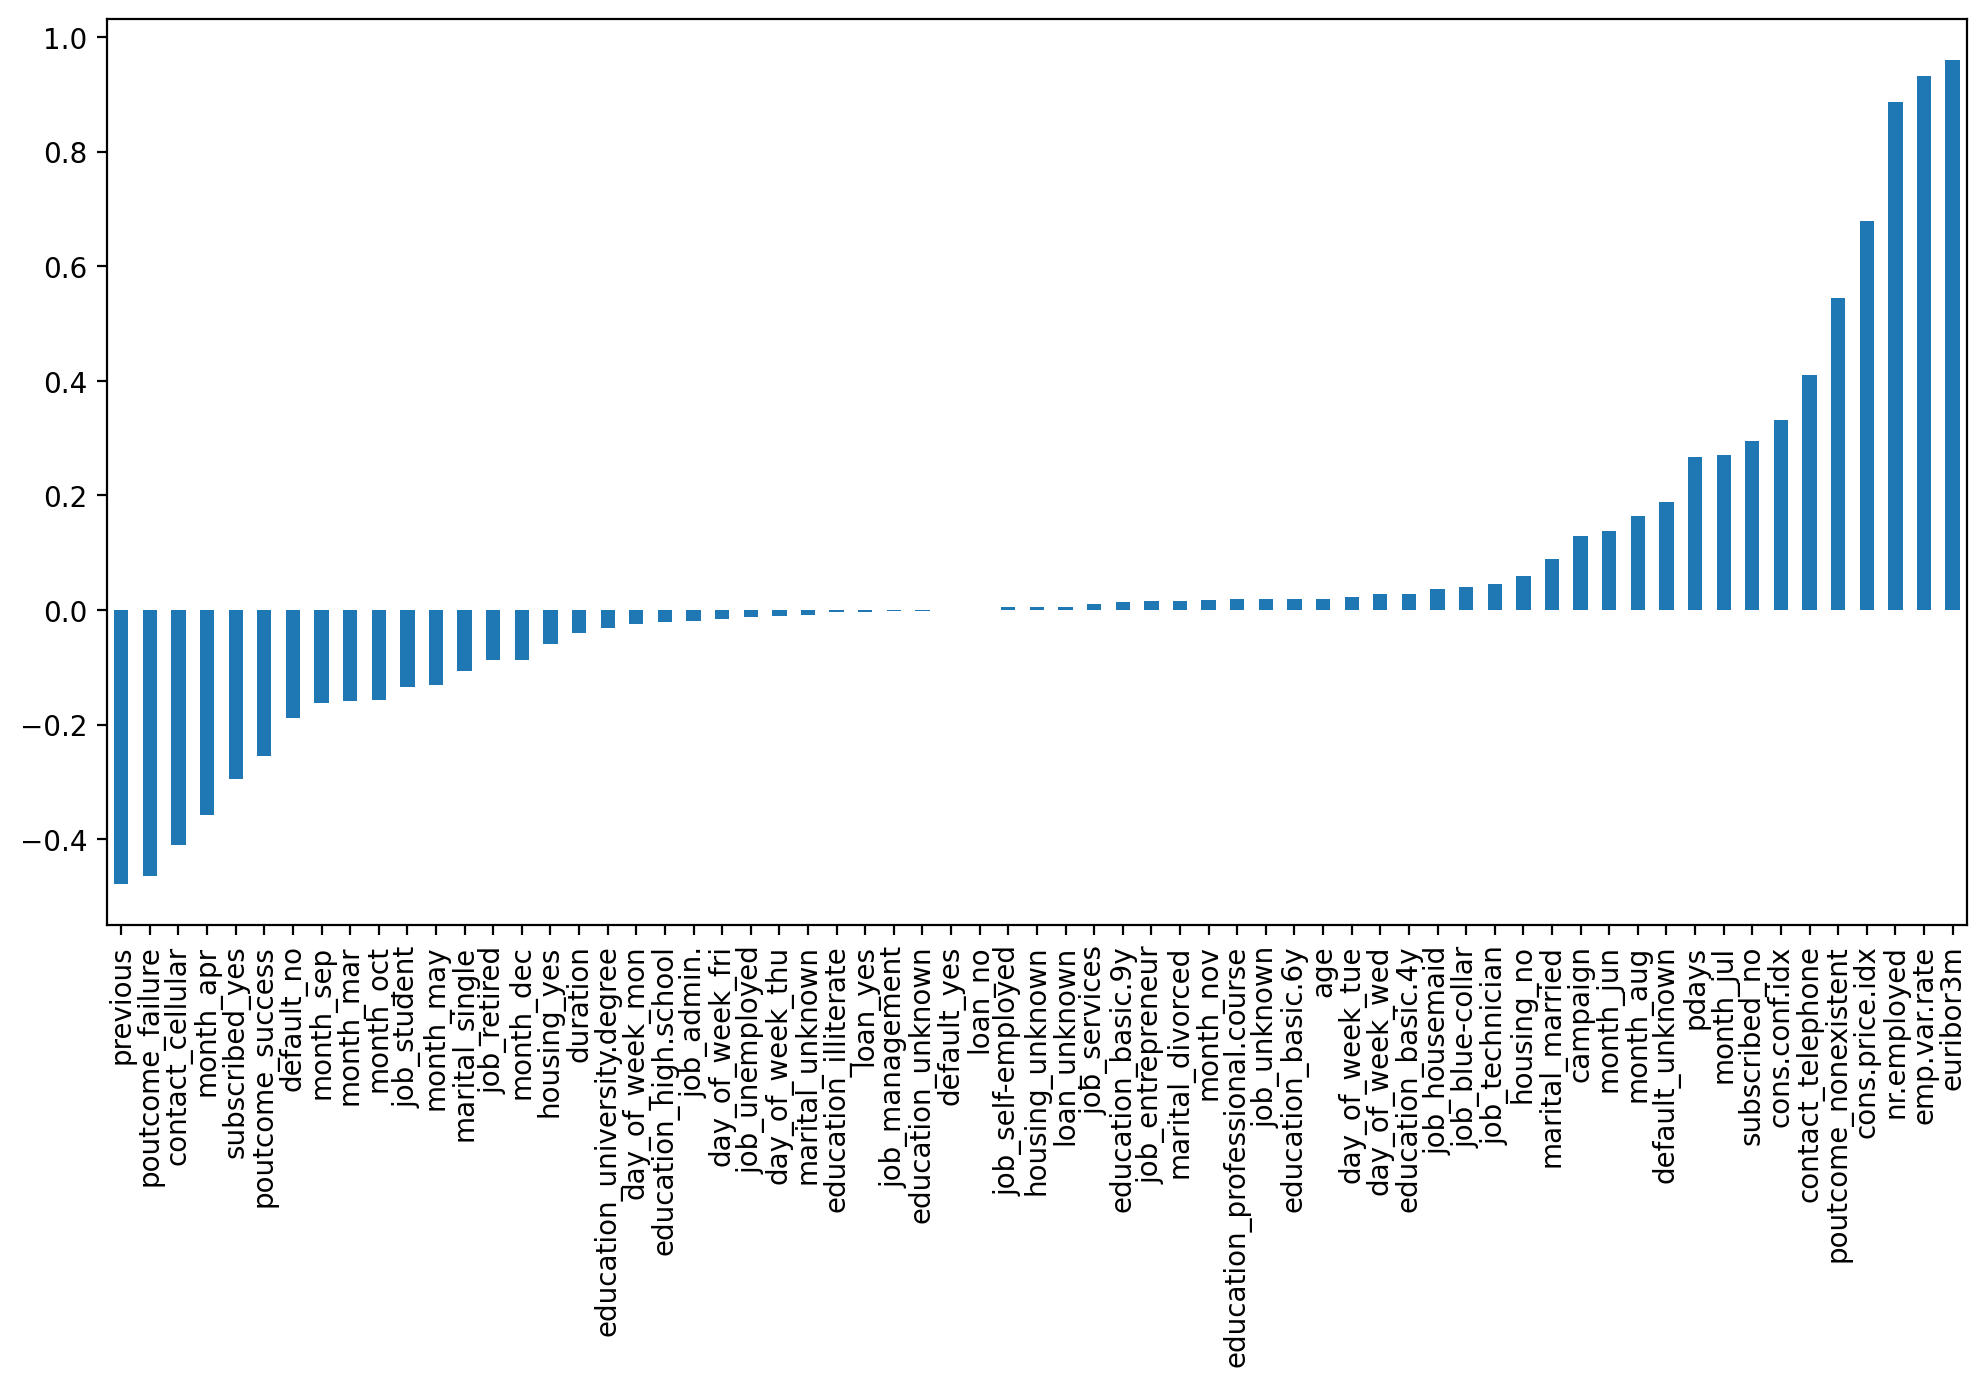

In [33]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing K Value

In [38]:
ssd = []

for k in range(2,10):
  model = KMeans(n_clusters=k)
  model.fit_predict(scaled_X)

  ssd.append(model.inertia_)   #SSD(Sum of Squared Distance) ---> Cluster Center

In [39]:
ssd

[2469792.3673020806,
 2370787.246856624,
 2271502.808197123,
 2217631.5041520223,
 2149009.610723498,
 2104687.2426227527,
 2056006.1886573564,
 1998924.3917555073]

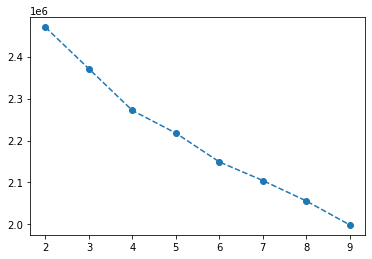

In [40]:
plt.plot(range(2,10),ssd,'o--')

In [41]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.217632e+06
4    2.149010e+06
5    2.104687e+06
6    2.056006e+06
7    1.998924e+06
dtype: float64

In [42]:
pd.Series(ssd).diff()

0             NaN
1   -99005.120445
2   -99284.438660
3   -53871.304045
4   -68621.893429
5   -44322.368101
6   -48681.053965
7   -57081.796902
dtype: float64